# Bone Mineral Density Prediction

## Data Dictionary
This dataset was downloaded from Kaggle
https://www.kaggle.com/datasets/amarsharma768/bmd-data

| Column | Description |
|---|---|
| id |  id of individual |
| Age | Age of individual |
| Sex | Gender of individual |
| fracture | Fracture status of individual |
| weight_kg | Weight in kg of individual |
| height_cm |  Height in cm of individual |
| medication |  Medication individual is on |
| bmd  | Bone Mineral Density of individual |





## 1. Import Libraries and load Data

**What we do here:**
- Import essential libraries.
- Load `bmd.csv` .
- Show the first few rows to confirm the schema.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

RANDOM_STATE= 42

In [2]:
csv_path="../Data/raw/bmd.csv"

data= pd.read_csv(csv_path)
print("\nFirst 5 Rows of the dataset:")
data.head()



First 5 Rows of the dataset:


,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


## 2. Understanding and exploring Data

**what we do here:**
- Inspect data types, missing values
- Get statistics


In [3]:
print("\nStatistical Summary:")
print(data.describe())
print("Non-numerical count")
print(data['fracture'].value_counts())
print(data['medication'].value_counts())
print(data["sex"].value_counts())



Statistical Summary:
                 id         age   weight_kg   height_cm  waiting_time  \
count    169.000000  169.000000  169.000000  169.000000    169.000000   
mean    9102.556213   63.631531   64.665680  160.254438     19.739645   
std     8744.623598   12.356936   11.537171    7.928272     15.800570   
min       35.000000   35.814058   36.000000  142.000000      5.000000   
25%     2018.000000   54.424211   56.000000  154.000000      9.000000   
50%     6702.000000   63.487837   64.500000  160.500000     14.000000   
75%    17100.000000   72.080558   73.000000  166.000000     24.000000   
max    24208.000000   88.753795   96.000000  177.000000     96.000000   

              bmd  
count  169.000000  
mean     0.783104  
std      0.166529  
min      0.407600  
25%      0.670800  
50%      0.786100  
75%      0.888800  
max      1.362400  
Non-numerical count
fracture
no fracture    119
fracture        50
Name: count, dtype: int64
medication
No medication      136
Glucocorticoi

In [4]:
print("\nData Types and Missing Values:")
data.isnull().sum()


Data Types and Missing Values:


id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64

## 3. Data Handling

**what we do here:**
- Drop irrelevant columns e.g. waiting_time

In [5]:
data.drop(columns=["waiting_time"], inplace=True)
print(data.columns)

Index(['id', 'age', 'sex', 'fracture', 'weight_kg', 'height_cm', 'medication',
       'bmd'],
      dtype='object')


# Label Encoding
**what we do here:**
- Encode numeric values for categorical columns (fracture, medication and sex)
- Ensure their count matches when the columns were non-numerical

Label Encoding Results:
Test Mean Squared Error: 0.0108
Test R^2 Score: 0.5372


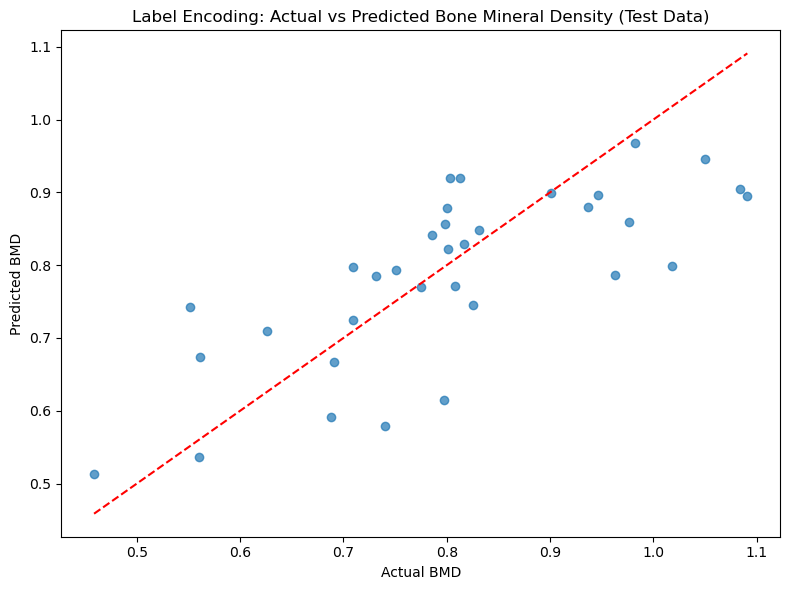

In [6]:
# Label Encoding for categorical columns
encoder = LabelEncoder()
data['fracture'] = encoder.fit_transform(data['fracture'])
data['medication'] = encoder.fit_transform(data['medication'])
data["sex"] = encoder.fit_transform(data["sex"])

# Split features and target for Label Encoding
x = data.drop("bmd", axis=1)
y = data["bmd"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

# Train and evaluate Label Encoding model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Calculate metrics for Label Encoding
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Label Encoding Results:")
print(f"Test Mean Squared Error: {mse_test:.4f}")
print(f"Test R^2 Score: {r2_test:.4f}")

# Plot actual vs predicted for Label Encoding
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual BMD")
plt.ylabel("Predicted BMD")
plt.title("Label Encoding: Actual vs Predicted Bone Mineral Density (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

One-Hot Encoding Results:
Test Mean Squared Error: 0.0107
Test R^2 Score: 0.5414


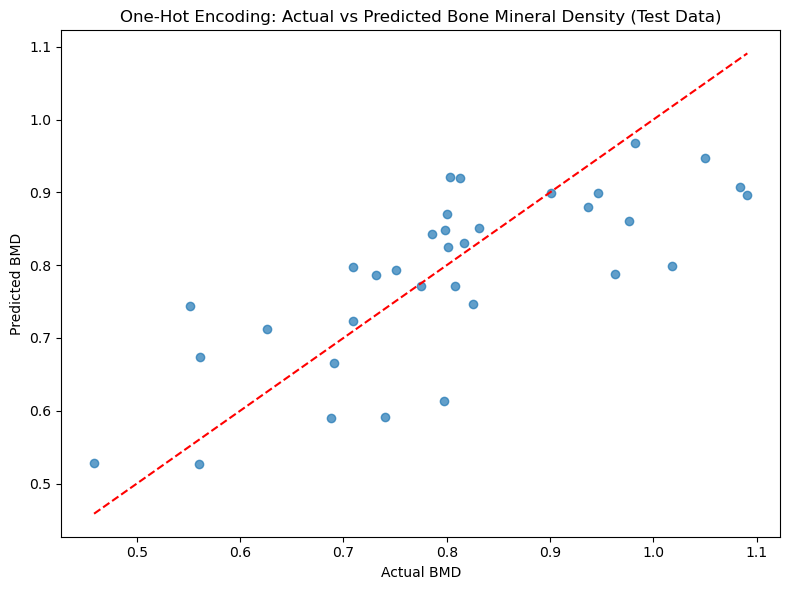

In [7]:
# One-Hot Encoding for categorical columns
data_ohe = pd.get_dummies(data, columns=['fracture', 'medication', 'sex'])

# Split features and target
x_ohe = data_ohe.drop("bmd", axis=1)
y_ohe = data_ohe["bmd"]
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(x_ohe, y_ohe, test_size=0.2, random_state=RANDOM_STATE)

# Train and evaluate model
lr_ohe = LinearRegression()
lr_ohe.fit(X_train_ohe, y_train_ohe)
y_pred_ohe = lr_ohe.predict(X_test_ohe)

# Calculate metrics for One-Hot Encoding
mse_test_ohe = mean_squared_error(y_test_ohe, y_pred_ohe)
r2_test_ohe = r2_score(y_test_ohe, y_pred_ohe)

# Print One-Hot Encoding Results
print("One-Hot Encoding Results:")
print(f"Test Mean Squared Error: {mse_test_ohe:.4f}")
print(f"Test R^2 Score: {r2_test_ohe:.4f}")

# Plot actual vs predicted for One-Hot Encoding
plt.figure(figsize=(8,6))
plt.scatter(y_test_ohe, y_pred_ohe, alpha=0.7)
plt.xlabel("Actual BMD")
plt.ylabel("Predicted BMD")
plt.title("One-Hot Encoding: Actual vs Predicted Bone Mineral Density (Test Data)")
plt.plot([y_test_ohe.min(), y_test_ohe.max()], [y_test_ohe.min(), y_test_ohe.max()], 'r--')
plt.tight_layout()
plt.show()

## Model Performance Comparison

Comparing Label Encoding vs One-Hot Encoding based on:
- Mean Squared Error (MSE) - Lower is better
- R² Score - Higher is better (closer to 1)

In [8]:
#comparison of both encoding methods
print("=== Performance Comparison ===")
print("\nLabel Encoding:")
print(f"MSE: {mse_test:.4f}")
print(f"R²:  {r2_test:.4f}")

print("\nOne-Hot Encoding:")
print(f"MSE: {mse_test_ohe:.4f}")
print(f"R²:  {r2_test_ohe:.4f}")

# Determine which method is better
print("\n=== Conclusion ===")
if mse_test_ohe < mse_test:
    print("One-Hot Encoding performed better")
elif mse_test_ohe > mse_test:
    print("Label Encoding performed better")
else:
    print("Both methods performed similarly")

=== Performance Comparison ===

Label Encoding:
MSE: 0.0108
R²:  0.5372

One-Hot Encoding:
MSE: 0.0107
R²:  0.5414

=== Conclusion ===
One-Hot Encoding performed better


## 4. Outlier Detection and Handling

**what we do here:**
- Visualize the dataset to see the outliers
- Use IQR to handle outliers

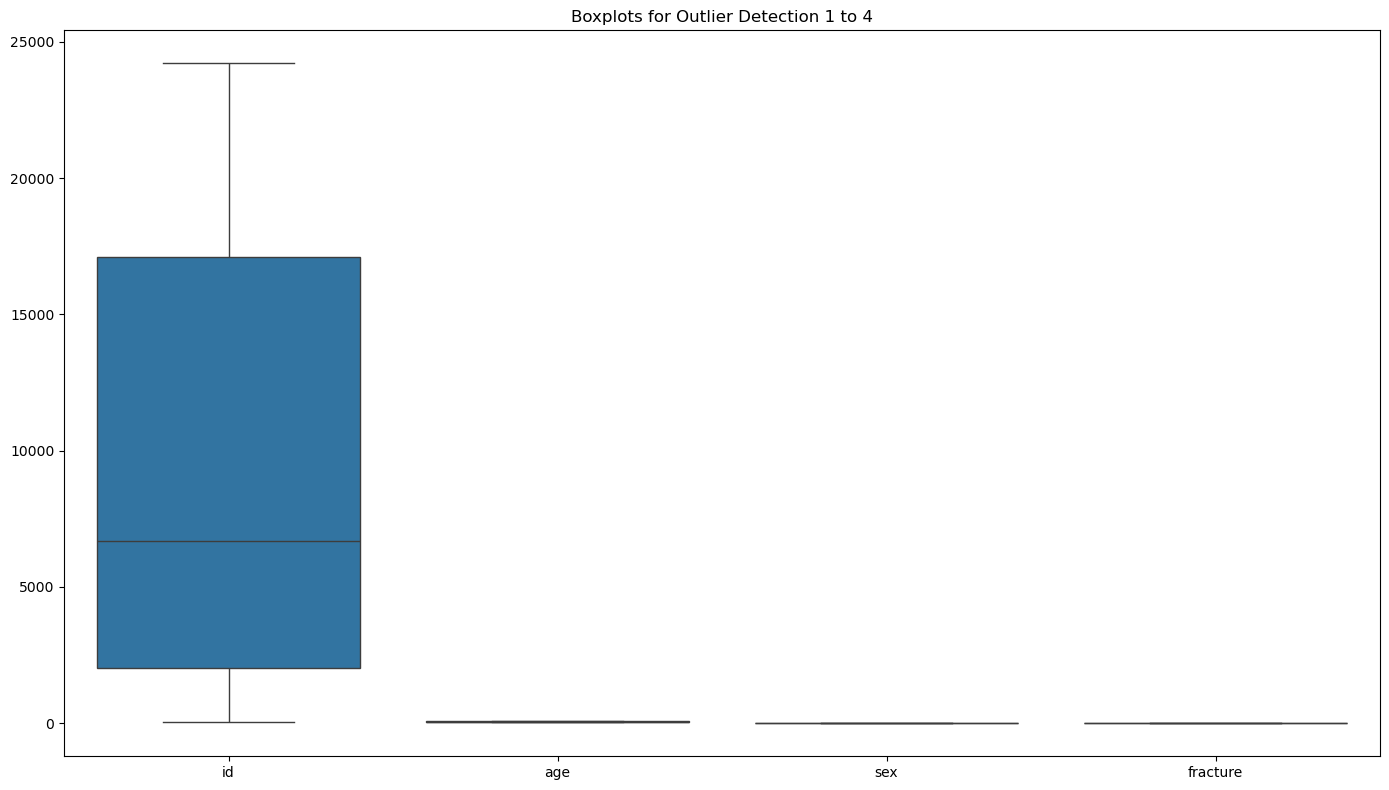

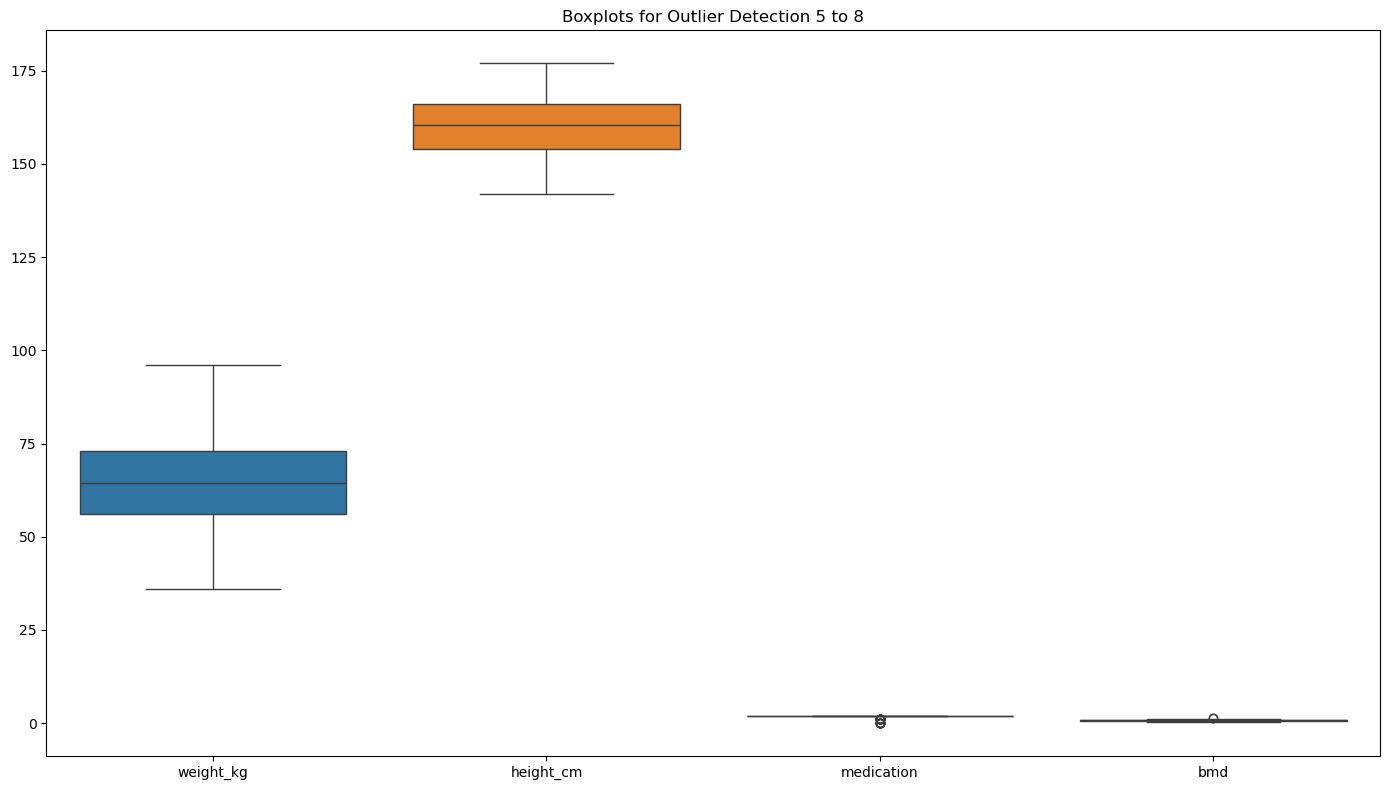

In [9]:
columns = data.columns
n_columns = len(columns)
group_size = 4
n_plots =(n_columns +group_size -1)// group_size

for i in range(n_plots):
    start_col = i * group_size
    end_col = min((i+1) *group_size, n_columns)
    cols_to_plot = columns[start_col:end_col]

    plt.figure(figsize=(14, 8))

    sns.boxplot(data=data[cols_to_plot])

    plt.title(f'Boxplots for Outlier Detection {start_col +1} to {end_col}')
    plt.tight_layout()
    plt.show()

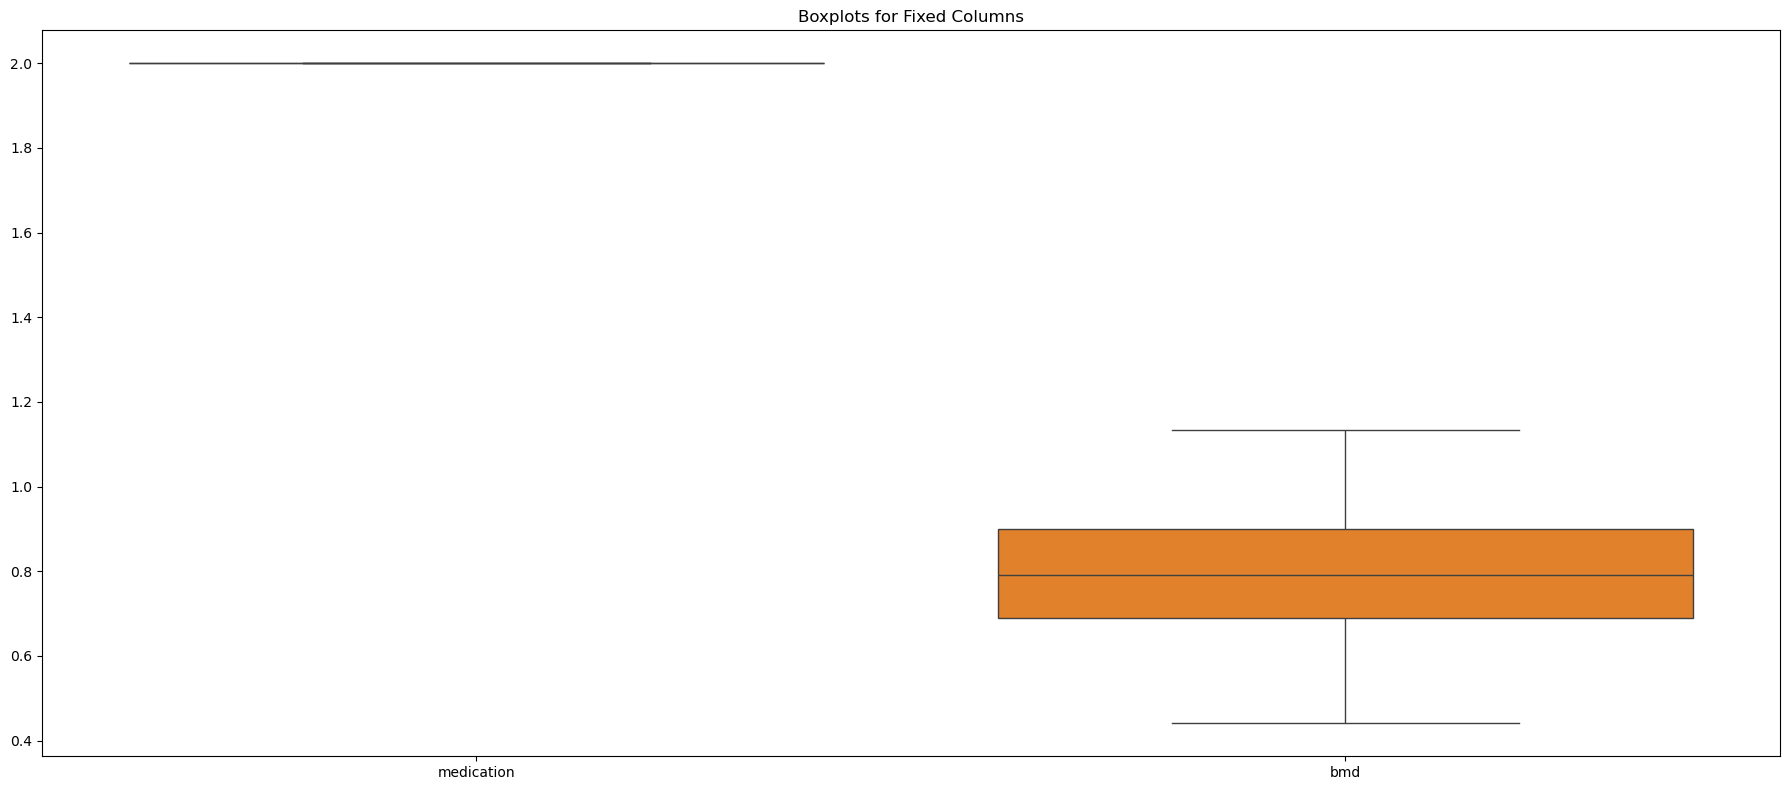

In [10]:
# handling outliers using IQR for columns:
# "medication", "bmd"

columns_to_plot = [ "medication", "bmd"]

for col in columns_to_plot:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

plt.figure(figsize=(18, 8))
sns.boxplot(data=data[columns_to_plot])
plt.title("Boxplots for Fixed Columns")
plt.tight_layout()
plt.show()


## 5. Normalization

**what we do here:**
- Scale data into a fixed range [0,1]
- Visualise how scaling affected the data

In [11]:
scalar = MinMaxScaler()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = scalar.fit_transform(data[numerical_cols])
print("\nFirst 5 Rows of the Normalized dataset:")
data.head()


First 5 Rows of the Normalized dataset:


,id,age,sex,fracture,weight_kg,height_cm,medication,bmd
1,0.359451,0.764740,0,1,0.700000,0.571429,2,0.510826
2,0.277210,0.669695,1,1,0.616667,0.814286,2,0.672633
3,0.998842,0.812738,0,1,0.400000,0.171429,2,0.390445
4,0.704795,0.351997,1,1,0.316667,0.542857,2,0.505485
5,0.156000,0.792255,1,1,0.483333,0.742857,2,0.417725


## 6. Data Splitting

**what we do here:**
- Use the Hold out Method to split data in an 80-20 split
- Dropping the Target column "bmd" which indicates the bone mineral density of the patient

In [12]:
x= data.drop("bmd", axis=1)
y= data["bmd"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)
print(f"\nX_train shape: {X_train.shape}")
print(f"\nX_test shape: {X_test.shape}")


X_train shape: (108, 7)

X_test shape: (27, 7)


Train Mean Squared Error: 0.0215
Train R^2 Score: 0.5607
Test Mean Squared Error: 0.0132
Test R^2 Score: 0.7239


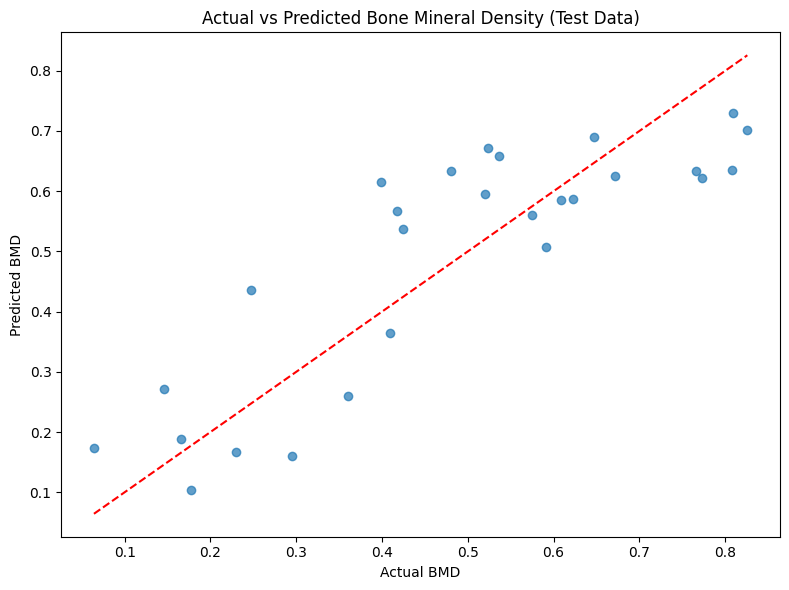

Model generalizes well (R^2 in reasonable range)


In [ ]:
# 7. Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

# Initialize and train the model 
lr = LinearRegression()
lr.fit(X_train, y_train) 

# Predict on train and test data
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test) 

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Train Mean Squared Error: {mse_train:.4f}") 
print(f"Train R^2 Score: {r2_train:.4f}") 
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred) 
print(f"Test Mean Squared Error: {mse_test:.4f}") 
print(f"Test R^2 Score: {r2_test:.4f}") 

#Plot actual vs predicted (test only)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual BMD")
plt.ylabel("Predicted BMD")
plt.title("Actual vs Predicted Bone Mineral Density (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show() 

# Simple overfitting/underfitting check
if r2_test < 0.5:
    print("Model is likely underfitting (low R^2 on test set)")
elif r2_test > 0.95:
    print("Model may be overfitting (very high R^2 on test set, check train/test gap)")
else:
    print("Model generalizes well (R^2 in reasonable range)")

## 8. Classification models

**what we do here**
- create a new train data.
- create new test data to predict whether there will be fracture or not.
- use both train and test with a logistic regression model to predict fracture.
- use SVM model on new train and test data
- evaluate performance of both models



In [14]:
variables = data.drop('fracture', axis=1)
target = data['fracture']

x_fracture_train, x_fracture_test, y_fracture_train, y_fracture_test = train_test_split(variables, target, test_size=0.2, random_state=RANDOM_STATE)
print(f"\nX_fracture_train shape: {x_fracture_train.shape}")
print(f"\nX_fracture_test shape: {x_fracture_test.shape}")


X_fracture_train shape: (108, 7)

X_fracture_test shape: (27, 7)


**8.1 Logistic Model**

In [16]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(x_fracture_train, y_fracture_train)

y_pred_log = log_model.predict(x_fracture_test)

print("Logistic Training Successful")

Logistic Training Successful


In [17]:
print("\nLogistic Regression Model Evaluation:")

print("Accuracy:", accuracy_score(y_fracture_test, y_pred_log))
print("Precision:", precision_score(y_fracture_test, y_pred_log))
print("Recall:", recall_score(y_fracture_test, y_pred_log))
print("F1 Score:", f1_score(y_fracture_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_fracture_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_fracture_test, y_pred_log))


Logistic Regression Model Evaluation:
Accuracy: 0.8148148148148148
Precision: 0.8181818181818182
Recall: 0.9473684210526315
F1 Score: 0.8780487804878049

Confusion Matrix:
 [[ 4  4]
 [ 1 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.82      0.95      0.88        19

    accuracy                           0.81        27
   macro avg       0.81      0.72      0.75        27
weighted avg       0.81      0.81      0.80        27



**8.2 SVM model**

In [18]:

svm_model = SVC(kernel='rbf', probability=True)

svm_model.fit(x_fracture_train, y_fracture_train)

y_pred_svm = svm_model.predict(x_fracture_test)
y_proba_svm = svm_model.predict_proba(x_fracture_test)[:, 1]
print("SVM Training Successful")

SVM Training Successful


In [19]:
print("\nLogistic Regression Model Evaluation:")

print("Accuracy:", accuracy_score(y_fracture_test, y_pred_svm))
print("Precision:", precision_score(y_fracture_test, y_pred_svm))
print("Recall:", recall_score(y_fracture_test, y_pred_svm))
print("F1 Score:", f1_score(y_fracture_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_fracture_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_fracture_test, y_pred_svm))


Logistic Regression Model Evaluation:
Accuracy: 0.7777777777777778
Precision: 0.8095238095238095
Recall: 0.8947368421052632
F1 Score: 0.85

Confusion Matrix:
 [[ 4  4]
 [ 2 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.81      0.89      0.85        19

    accuracy                           0.78        27
   macro avg       0.74      0.70      0.71        27
weighted avg       0.77      0.78      0.77        27



**8.3 Comparison between Logistic and SVM**

In [23]:
# Store metrics
metrics = {
    "Accuracy": [
        accuracy_score(y_fracture_test, y_pred_log),
        accuracy_score(y_fracture_test, y_pred_svm)
    ],
    "Precision": [
        precision_score(y_fracture_test, y_pred_log),
        precision_score(y_fracture_test, y_pred_svm)
    ],
    "Recall": [
        recall_score(y_fracture_test, y_pred_log),
        recall_score(y_fracture_test, y_pred_svm)
    ],
    "F1 Score": [
        f1_score(y_fracture_test, y_pred_log),
        f1_score(y_fracture_test, y_pred_svm)
    ]
}

models = ["Logistic Regression", "SVM (RBF Kernel)"]

comparison_df = pd.DataFrame(metrics, index=models)
print("\n===== MODEL PERFORMANCE COMPARISON =====\n")
print(comparison_df)

# Decide which model is better
# Priority: F1 Score (balanced), then Recall (clinical), then Accuracy
log_score = (comparison_df.loc["Logistic Regression", "F1 Score"] * 0.5 +
             comparison_df.loc["Logistic Regression", "Recall"] * 0.3 +
             comparison_df.loc["Logistic Regression", "Accuracy"] * 0.2)

svm_score = (comparison_df.loc["SVM (RBF Kernel)", "F1 Score"] * 0.5 +
             comparison_df.loc["SVM (RBF Kernel)", "Recall"] * 0.3 +
             comparison_df.loc["SVM (RBF Kernel)", "Accuracy"] * 0.2)

print("\n===== MODEL SELECTION RESULT =====\n")

if log_score > svm_score:
    best_model = "Logistic Regression"
else:
    best_model = "SVM"

print(f"Best Model: {best_model}\n")

# Explanation generator
def explain_results(best_model, comparison_df):
    log = comparison_df.loc["Logistic Regression"]
    svm = comparison_df.loc["SVM (RBF Kernel)"]

    print("===== CONCLUSION =====")

    if best_model == "Logistic Regression":
        print(
            f"""
Logistic Regression outperformed the SVM model.

Reasons:
- Higher Accuracy ({log['Accuracy']:.2f} vs {svm['Accuracy']:.2f})
- Higher Recall ({log['Recall']:.2f} vs {svm['Recall']:.2f})
- Higher F1 Score ({log['F1 Score']:.2f} vs {svm['F1 Score']:.2f})
            """
        )
    else:
        print(
            f"""
The SVM model outperformed Logistic Regression.

Reasons:
- Higher Accuracy ({svm['Accuracy']:.2f} vs {log['Accuracy']:.2f})
- Higher Recall ({svm['Recall']:.2f} vs {log['Recall']:.2f})
- Higher F1 Score ({svm['F1 Score']:.2f} vs {log['F1 Score']:.2f})
            """
        )

explain_results(best_model, comparison_df)



===== MODEL PERFORMANCE COMPARISON =====

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.814815   0.818182  0.947368  0.878049
SVM (RBF Kernel)     0.777778   0.809524  0.894737  0.850000

===== MODEL SELECTION RESULT =====

Best Model: Logistic Regression

===== CONCLUSION =====

Logistic Regression outperformed the SVM model.

Reasons:
- Higher Accuracy (0.81 vs 0.78)
- Higher Recall (0.95 vs 0.89)
- Higher F1 Score (0.88 vs 0.85)
            
